### **Regression Metrics**

**1. MEAN ABSOLUTE ERROR**
- it is the mean of the absolute difference between the actual value and the predicted value.  
$MAE = \frac{1}{n} \sum_{i=1}^n \left| Y_i - \hat{Y}_i \right|$

**Advantages**
* same unit
* robust aganist outliers

**Disadvantages**
* Diffrentatiation is not possible for the absolute value at x=0.
* it donot penalizes outliers.

**2. MEAN SQUARED ERROR**
- it is the mean of the square of the difference between the actual value and the predicted value.  
$MAE = \frac{1}{n} \sum_{i=1}^n \left( Y_i - \hat{Y}_i \right)^2$

**Advantages**
* penalizes the outliers
* 

**3. ROOT MEAN SQUARED ERROR(RMSE)**
- it is the root mean of the squared of the difference between the actual value and the predicted value.  
$MAE = \frac{1}{n}\sqrt{ \sum_{i=1}^n \left( Y_i - \hat{Y}_i \right)^2}$

Output it same unit as the data. but it penalizes the outliers.

**4. R2 SCORE**
- It compares how good is the regression line to the mean line(line passing through mean of the dataset).  
$R2 score=1-\frac{SS_R}{SS_M}$\
$SS_r=\sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2$ (for the regression line)\
$SS_m=\sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2$ (for the mean line)


If the R2-score is zero means the regresssion line is same as the mean line that is the bad model performance.\
If the R2-score is 1 mean , the regression line perfectly fix the model mean the SS_r is zero(not possible).\
R2 score is negetive means the regression line donot even pass through the model and performs worst than the mean line.\
If R2 score is 0.8 means the 80% of the varience is explained by predictor.\


**5. ADJUSTED R2 SCORE**
* $R^2_{adj}=1-[\frac{(1-R2)(n-1)}{n-1-k}]$\
N &rarr; no of rows\
k &rarr; no of independent columns\
It measures no of the features which gives the best fitting model.\
for eg. if the irrelevant model is added the r2 score may not change but the addition of k decreses the R2 adjusted. For the addition of the relevant features, r2 score increase counteract the model increase in k.

### **Code Example**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('C:/Users/Acer/OneDrive/Documents/MACLEARNING/machinelearning/data/placement.csv')

In [3]:
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
X=data[['cgpa']]
Y=data['package']


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
x_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [9]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Text(0.5, 1.0, 'scatter plot to see realtion ')

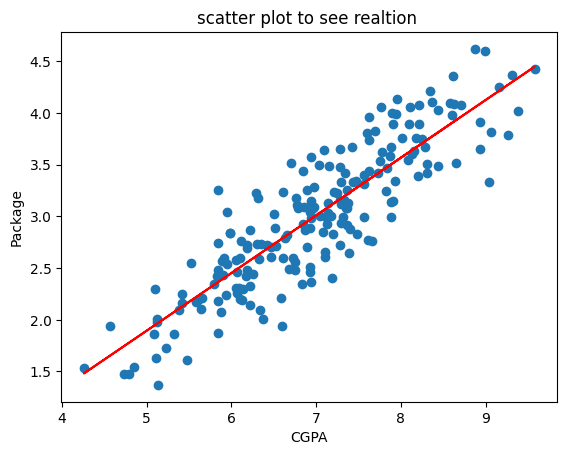

In [10]:
plt.scatter(data['cgpa'],data['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('scatter plot to see realtion ')

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [12]:
y_pred=lr.predict(x_test)
print('MAE:',mean_absolute_error(y_pred,y_test))
print('MSE:',mean_squared_error(y_pred,y_test))
print('R2 score:',r2_score(y_pred,y_test))

MAE: 0.2884710931878175
MSE: 0.12129235313495527
R2 score: 0.6626575570753073


In [13]:
x_test.shape


(40, 1)

In [14]:
#adjusted r2 score
1-((1-0.72)*(40-1))/(40-1-1)

0.7126315789473684

In [15]:
new_df1 = data.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.681729,3.26
1,5.12,0.128164,1.98
2,7.82,0.477062,3.25
3,7.42,0.722334,3.67
4,6.94,0.152743,3.57


Text(0, 0.5, 'Package(in lpa)')

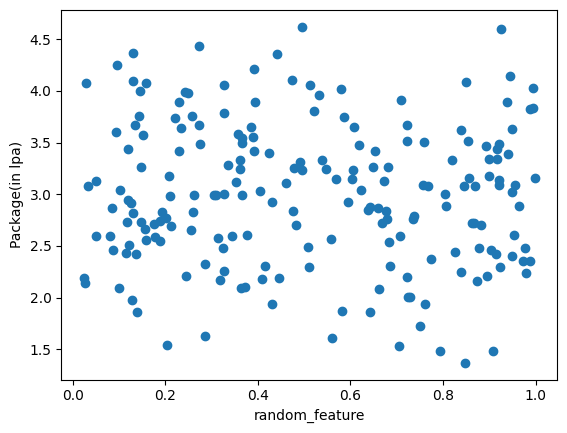

In [16]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [17]:

X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [18]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
lr = LinearRegression()

In [20]:

lr.fit(X_train,y_train)

LinearRegression()

In [21]:

y_pred = lr.predict(X_test)

In [22]:

print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.78090031646514


In [23]:

1 - ((1-r2)*(40-1)/(40-1-2))

0.7690570903281206